<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_ajuste_logistica as sal

In [2]:
df = pd.read_pickle('datos/df_estandarizado.pkl')
df = df.astype(float)

In [3]:
df

,customer_id,merchant_id,is_fraudulent,location,purchase_category,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,amount_minmax,customer_age_minmax
0,0.540541,0.517857,0.0,0.497382,0.524610,0.0,0.0,1.0,0.0,0.575512,0.480769
1,0.543689,0.536842,1.0,0.529126,0.486978,0.0,0.0,0.0,1.0,0.189330,0.826923
2,0.586207,0.506024,1.0,0.600000,0.524610,0.0,0.0,1.0,0.0,0.123979,0.750000
3,0.543689,0.525773,1.0,0.600000,0.505313,0.0,1.0,0.0,0.0,0.761789,0.788462
4,0.470000,0.523810,1.0,0.497382,0.513546,0.0,0.0,1.0,0.0,0.188182,0.346154
...,...,...,...,...,...,...,...,...,...,...,...
9846,0.534091,0.548077,1.0,0.497608,0.479829,0.0,0.0,1.0,0.0,0.893575,0.346154
9847,0.504950,0.523364,0.0,0.481651,0.513546,0.0,0.0,1.0,0.0,0.001956,0.461538
9848,0.514019,0.451923,0.0,0.574468,0.486978,1.0,0.0,0.0,0.0,0.633088,0.346154
9849,0.484848,0.435897,1.0,0.537688,0.513546,0.0,0.0,0.0,1.0,0.283003,0.750000


In [4]:
analisis_mod_clas = sal.AnalisisModelosClasificacion(df, "is_fraudulent")

In [5]:
analisis_mod_clas.ajustar_modelo("logistic_regression")

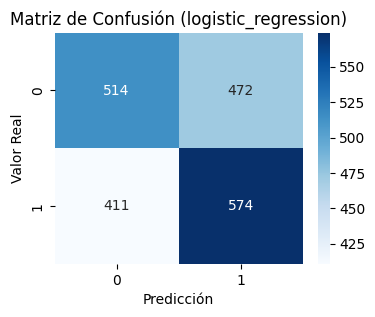

In [6]:
analisis_mod_clas.plot_matriz_confusion("logistic_regression", figsize=(4,3))

/Users/davidfranco/Library/CloudStorage/OneDrive-Personal/Hackio/Jupyter/Clase 1125 - Prepocesamiento logística/laboratorio-modulo8-leccion08-preprocesamiento-logistica/src/soporte_ajuste_logistica.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


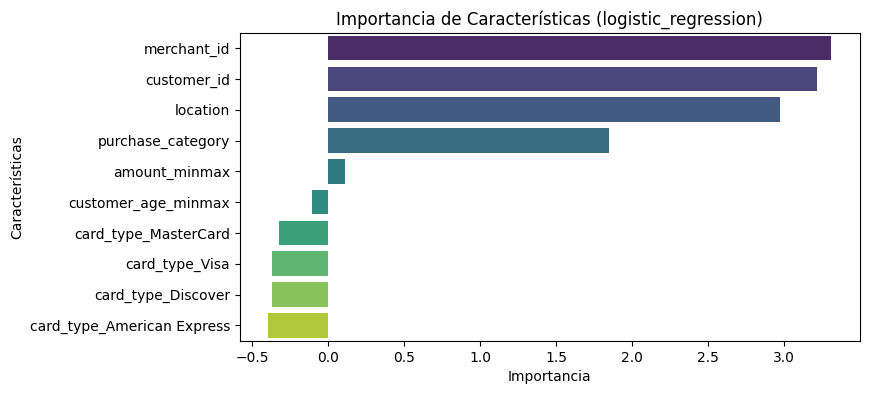

In [7]:
analisis_mod_clas.importancia_predictores("logistic_regression", figsize=(8, 4))

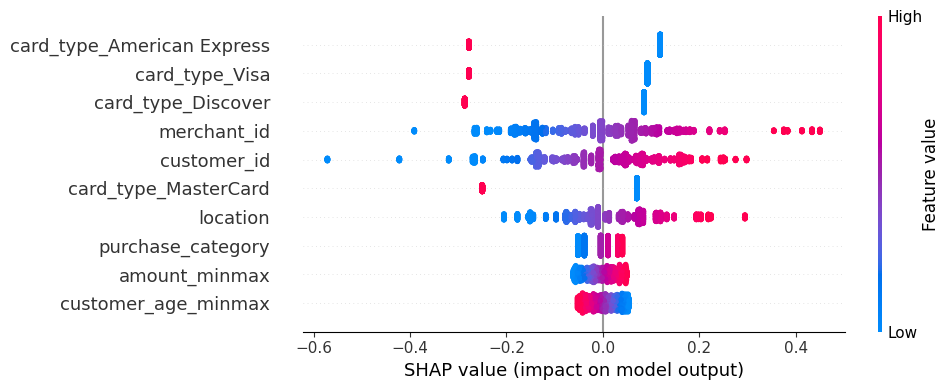

In [8]:
analisis_mod_clas.plot_shap_summary("logistic_regression", plot_size=(10, 4))

- De la gráfica, podemos interpretar que:
    - *Card type AMEX/Visa/Discover/MasterCard:* en el caso de los tipos de tarjetas, vemos que, el efecto sobre la VR (fraude o no) es más fuerte en negativo. Quiere decir, por ejemplo, que si el tipo de tarjeta es American Express, hay menos probabilidades de que sea fraude.
    - *Amount:* puede verse que, cuanto mayor es monto de la compra, mayores las posibilidades de fraude, y se reparte de manera similar en positivo y en negativo.
    - *Customer_age:* en el caso de la edad, cuanto más baja es la edad del cleinte, mayor la probabilidad de fraude, repartiéndose de manera similar en positivo y en negativo.

In [14]:
parametros_default = {
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [2, 6, 8, 20, 12, 16],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [4, 6, 8]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

In [10]:
df_lg = analisis_mod_clas.ajustar_modelo("logistic_regression")
df_lg = analisis_mod_clas.calcular_metricas("logistic_regression")
df_lg["modelo"] = "logistic_regression"
df_lg

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.558376,0.558223,0.558376,0.557772,0.115841,0.588857,0.000896,NaN,NaN,NaN,logistic_regression
test,0.552004,0.552218,0.552004,0.551582,0.104036,0.579057,NaN,NaN,0.000896,NaN,logistic_regression


In [11]:
df_tree = analisis_mod_clas.ajustar_modelo("tree")
df_tree = analisis_mod_clas.calcular_metricas("tree")
df_tree["modelo"] = "tree"
df_tree

El mejor modelo es DecisionTreeClassifier(max_depth=3)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.557234,0.558658,0.557234,0.551353,0.111677,0.577567,0.000975,8.0,NaN,NaN,tree
test,0.541857,0.544258,0.541857,0.535726,0.083821,0.551706,NaN,NaN,0.000975,8.0,tree


In [12]:
df_rf = analisis_mod_clas.ajustar_modelo("random_forest")
df_rf = analisis_mod_clas.calcular_metricas("random_forest")
df_rf["modelo"] = "random_forest"
df_rf

El mejor modelo es RandomForestClassifier(max_depth=6, min_samples_leaf=4, n_estimators=50,
                       n_jobs=-1)


/Users/davidfranco/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.626269,0.627199,0.626269,0.624899,0.251291,0.680960,0.024414,-1.0,NaN,NaN,random_forest
test,0.548960,0.549365,0.548960,0.548090,0.097960,0.568668,NaN,NaN,0.024414,-1.0,random_forest


In [13]:
df_gb = analisis_mod_clas.ajustar_modelo("gradient_boosting")
df_gb = analisis_mod_clas.calcular_metricas("gradient_boosting")
df_gb["modelo"] = "gradient_boost"
df_gb

El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_split=5,
                           n_estimators=200, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.605330,0.606251,0.605330,0.603526,0.209191,0.656165,0.030024,8.0,NaN,NaN,gradient_boost
test,0.536783,0.537182,0.536783,0.535624,0.073614,0.558746,NaN,NaN,0.030024,8.0,gradient_boost


In [17]:
df_xgb =analisis_mod_clas.ajustar_modelo("xgboost", param_grid=parametros_default["xgboost"])
df_xgb = analisis_mod_clas.calcular_metricas("xgboost")
df_xgb["modelo"] = "x_gradient_boost"
df_xgb

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.623985,0.624862,0.623985,0.622630,0.246725,0.684182,0.009599,NaN,NaN,NaN,x_gradient_boost
test,0.540842,0.541215,0.540842,0.539872,0.081727,0.559631,NaN,NaN,0.009599,NaN,x_gradient_boost


In [ ]:
df_completo = pd.concat([df_lg, df_tree, df_rf, df_gb, df_xgb])
df_completo.reset_index(drop=True, inplace=True)
df_completo.style.apply(sal.color_filas_por_modelo, axis = 1)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.558376,0.558223,0.558376,0.557772,0.115841,0.588857,0.002242,nan,nan,nan,logistic_regression
1,0.552004,0.552218,0.552004,0.551582,0.104036,0.579057,nan,nan,0.002242,nan,logistic_regression
2,0.557234,0.558658,0.557234,0.551353,0.111677,0.577567,0.000837,8.000000,nan,nan,tree
3,0.541857,0.544258,0.541857,0.535726,0.083821,0.551706,nan,nan,0.000837,8.000000,tree
4,0.628426,0.629277,0.628426,0.627172,0.255662,0.685017,0.033124,nan,nan,nan,random_forest
5,0.547438,0.547755,0.547438,0.546737,0.094912,0.560436,nan,nan,0.033124,nan,random_forest
6,0.626650,0.627058,0.626650,0.625842,0.252337,0.676949,0.009373,8.000000,nan,nan,gradient_boost
7,0.549975,0.550144,0.549975,0.549630,0.099975,0.566303,nan,nan,0.009373,8.000000,gradient_boost
8,0.623985,0.624862,0.623985,0.622630,0.246725,0.684182,0.005736,nan,nan,nan,x_gradient_boost
9,0.540842,0.541215,0.540842,0.539872,0.081727,0.559631,nan,nan,0.005736,nan,x_gradient_boost


- Nos preocupan especialmente los FN, ya que es crítico evitar clasificar una transacción fraudulenta como no fraudulenta. Por esta motivo, es preferible reducir los FN, aún cuando pueda resultar en un aumento de los FP.

- En este caso entonces, daremos prioridad un recall más alto, con una menor precisión.

- Al realizar un análisis de los modelos, podemos ver que, en este caso, el recall más alto y menor overfitting lo tenemos en la regresión logística. En el c